# PBS - TD5
## Réception d'un signal BPSK: canal gaussien et probabilité d'erreur

## Objectifs
 - Maitriser la relation fondamentale $p(t) = \frac{dF}{dt}(t)$.
 - Connaître et savoir manipuler la loi normale.
 - Appliquer les probabilités à un problème de communication basique.
 - Comprendre le lien entre taux d'erreur binaire et SNR.

# 1. Ajout d'une constante
Soit $X$ une variable aléatoire *quelconque*.
On définit la variable aléatoire $Y$ de la façon suivante: $$Y = X+2.$$

---
### (a) Exprimer la densité de probabilité $p_Y$ de $Y$ en fonction de $p_X$
---

### (b) Supposons que $X\sim\mathcal{N}(0, \sigma_{X}^2=0.25)$.
#### (i) Quelle est l'expression de $p_Y$ ?
#### (ii) Donner l'allure des deux densités, identifier leur maximum et les valeurs à $\{1,2,3\}\sigma$ de la moyenne
---

### (a) Densité de probabilité
Exprimer la densité de probabilité $p_Y$ de $Y$ en fonction de $p_X$.

**Rappel:** une densité est reliée à sa fonction de répartition par $$p(t) = \frac{dF}{dt}(t)$$

### (a) Densité de probabilité (solution)
\begin{align}
	p_Y(t) 	= \frac{dF_Y(t)}{dt}
			&= \frac{d\mathbb{P}(Y < t)}{dt}\\
			&= \frac{d\mathbb{P}(X+2 < t)}{dt}\\
			&= \frac{d\mathbb{P}(X < t-2)}{dt}\\
            &= \frac{dF_X(t-2)}{dt}\\
            &= 1\times F_X'(t-2)\quad\text{on utilise ici }(u \circ v)' = v' \times (u' \circ v)\\
            &= 1\times p_X(t-2)\\
	p_Y(t)	&= p_X(t-2)
\end{align}

La densité de $Y$ est simplement un décalage de $2$ vers la droite de la densité de $X$.

### (b) Loi normale
Supposons que $X\sim\mathcal{N}(0, \sigma_X^2=0.25)$. On a donc $$p_X(t) = \frac{1}{\sqrt{2\pi\sigma_X^2}} \exp\left(-\frac{t^2}{2\sigma_X^2}\right).$$

#### (i) Quelle est l'expression de $p_Y$ ?

$$p_Y(t) = \frac{1}{\sqrt{2\pi\sigma_X^2}} \exp\left(-\frac{(t-2)^2}{2\sigma_X^2}\right).$$

#### (ii) Donner l'allure des deux densités, identifier leur maximum et les valeurs à $\{1,2,3\}\sigma$ de la moyenne. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètre des figures
plt.rcParams.update(
    {
        'font.size': 22,
        'grid.linestyle': ':',
        'grid.color': 'k',
        'lines.linewidth': 5,
    }
)

# Pdf de la loi normale
def normpdf(x, mu=0, sigma=1):
    "Densité de probabilité d'une loi normale de paramètre (mu,sigma)."
    return 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-((x - mu)/(np.sqrt(2)*sigma))**2)

# Paramètre des lois
mu_X, mu_Y = 0, 2
sigma_X, sigma_Y = np.sqrt(.25), np.sqrt(.25)

# Abscisse
t = np.linspace(-2,5,1000)

# Densités
pdf_X = normpdf(t, mu_X, sigma_X) # densité de X
pdf_Y = normpdf(t, mu_Y, sigma_Y) # densité de Y
pdf_Y_bis = normpdf(t - 2, mu_X, sigma_X) # densité de Y (obtenue par translation de celle de X)

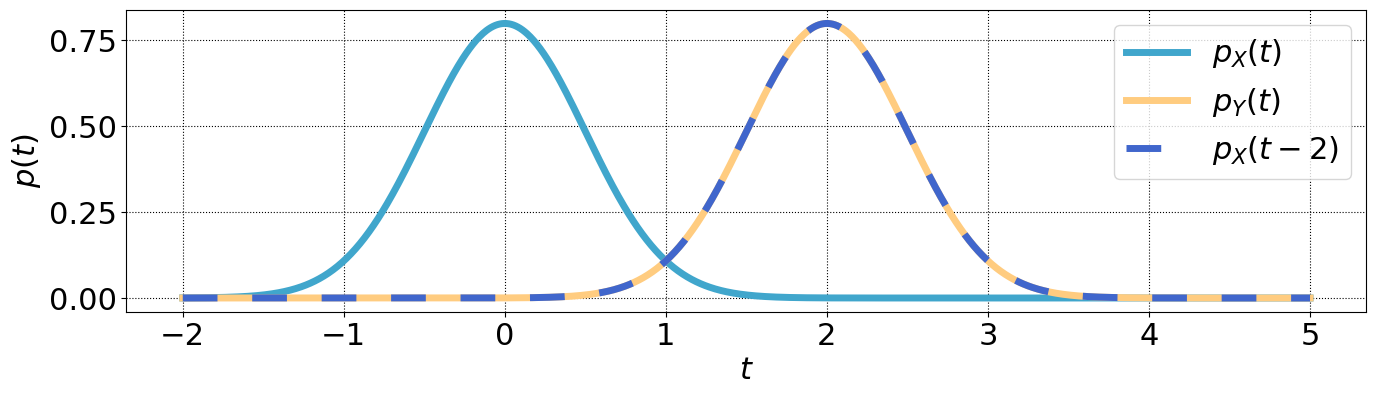

In [2]:
# Tracés des courbes
fig = plt.figure(figsize=(16,4), dpi=100);
ax = plt.axes();
ax.grid();
ax.set_xlabel("$t$");
ax.set_ylabel("$p(t)$");
ax.plot(t, pdf_X, label="$p_X(t)$", color=(.25, 0.65, 0.8))
ax.plot(t, pdf_Y, label="$p_Y(t)$", color=(1, 0.8, 0.5))
ax.plot(t, pdf_Y_bis, "--", label="$p_X(t-2)$", color=(0.25, 0.4, .8), dashes=(5, 5))
ax.legend();

# 2. Fonctions $\mathrm{erfc}(x)$ et $\mathrm{Q}(x)$
Soit $U \sim \mathcal{N}(0,1)$. La densité de $U$ est donnée par
$$p_{U}(t)=\frac{1}{\sqrt{2 \pi}} \exp \left(-\frac{t^{2}}{2}\right).$$

---
### (a) Probabilité d'erreur $\mathbb{P}(U > \alpha)$ à l'aide de $\mathrm{Q}$ et $\mathrm{erfc}$.
---
### (b) Idem avec $X \sim\mathcal{N}(0,\sigma_{X}^2)$.
---

### (a) Probabilité d'erreur $\mathbb{P}(U > \alpha)$
Les fonctions $\mathrm{Q}$ et $\mathrm{erfc}$ sont les suivantes:
\begin{align}
    \operatorname{Q}(x) = \frac{1}{\sqrt{2 \pi}} \int_{x}^{+\infty} e^{\frac{-t^{2}}{2}} \mathrm{d} t \qquad\text{et}\qquad
    \operatorname{erfc}(x)=\frac{2}{\sqrt{\pi}} \int_{x}^{+\infty} e^{-t^{2}} \mathrm{d} t
\end{align}

Commencer par écrire
\begin{align}
\mathbb{P}(U > \alpha) = \int_{\alpha}^{+\infty}{p_U(t) \mathrm{d}t} = \int_{\alpha}^{+\infty}{ \frac{1}{\sqrt{2 \pi}} \exp \left(-\frac{t^{2}}{2}\right)\mathrm{d}t}
\end{align}

### (a) Probabilité d'erreur $\mathbb{P}(U > \alpha)$  (solution)

- **Avec $\operatorname{Q}$ -** Le résultat est immédiat puisque c'est la définition:
\begin{align}
    P(U>\alpha) = \frac{1}{\sqrt{2 \pi}} \int_{\alpha}^{+\infty} e^{\frac{-t^{2}}{2}} \mathrm{d} t
                = \operatorname{Q}(\alpha)
\end{align}

---

### (a) Probabilité d'erreur $\mathbb{P}(U > \alpha)$  (solution)

- **Avec $\operatorname{erfc}$ -** On va faire le changement de variable suivant:
\begin{align}
    v = \frac{t}{\sqrt{2}} \Rightarrow v^2 = \frac{t^2}{2}\quad\text{et}\quad \mathrm{d}v = \frac{\mathrm{d}t}{\sqrt{2}}
\end{align}
On obtient alors:
\begin{align}
    P(U>\alpha) = \frac{1}{\sqrt{2 \pi}} \int_{\alpha}^{+\infty} e^{\frac{-t^{2}}{2}} \mathrm{d} t
                &= \frac{1}{\sqrt{2 \pi}} \int_{\frac{\alpha}{2}}^{+\infty} e^{-v^2} \sqrt{2}\mathrm{d} v\\
                &= \frac{1}{\sqrt{\pi}} \int_{\frac{\alpha}{2}}^{+\infty} e^{-v^2} \mathrm{d} v\\
                &= \frac{1}{2}\times\frac{2}{\sqrt{\pi}} \int_{\frac{\alpha}{2}}^{+\infty} e^{-v^2} \mathrm{d} v\\
    P(U>\alpha) &= \frac{1}{2}\operatorname{erfc}\left(\frac{\alpha}{2}\right)
\end{align}


### (b) Probabilité d'erreur $\mathbb{P}(X > \alpha)$
Cette fois-ci, on considère $X\sim\mathcal{N}(0,\sigma_X^2)$.

Les fonctions $\mathrm{Q}$ et $\mathrm{erfc}$ sont les suivantes:
\begin{align}
    \operatorname{Q}(x) = \frac{1}{\sqrt{2 \pi}} \int_{x}^{+\infty} e^{\frac{-t^{2}}{2}} \mathrm{d} t \qquad\text{et}\qquad
    \operatorname{erfc}(x)=\frac{2}{\sqrt{\pi}} \int_{x}^{+\infty} e^{-t^{2}} \mathrm{d} t
\end{align}

On peut commencer comme avec $U$, ou **être un peu plus malin**.

Essayons de nous ramener au cas précédent.

Comment relier les fonctions de répartition de $X$ et $U$ ?

\begin{align}
    \mathbb{P}(X > \alpha) = \mathbb{P}(U > \beta(\alpha))
\end{align}

### (b) Probabilité d'erreur $\mathbb{P}(U > \alpha)$  (solution)

On posera $U = \frac{X}{\sigma_X}$ qui a bien une variance de $1$:
\begin{align}
    \mathbb{V}[U] = \mathbb{V}\left[\frac{X}{\sigma_X}\right] = \frac{\mathbb{V}[X]}{\sigma_X^2} = \frac{\sigma_X^2}{\sigma_X^2} = 1
\end{align}
et donc
\begin{align}
    \mathbb{P}(X > \alpha) = \mathbb{P}\left(U > \frac{\alpha}{\sigma_X}\right)
\end{align}

- **Avec $\operatorname{Q}$ -** $\mathbb{P}\left(U > \frac{\alpha}{\sigma_X}\right) = \operatorname{Q}\left(\frac{\alpha}{\sigma_X}\right)$.
---
- **Avec $\operatorname{erfc}$ -** $\mathbb{P}\left(U > \frac{\alpha}{\sigma_X}\right) = \frac{1}{2}\operatorname{erfc}\left(\frac{\alpha}{2\sigma_X}\right)$.

# 3. Application
<img src="bpsk_transmission.png" width="50%" margin-left="auto" margin-right="auto">

On considère une transmission de type BPSK:

|Bit $-B$ | Amplitude émise $-E$|
|:---:|:---:|
$1$ | $2 V$ |
$0$ | $0 V$ |

Le canal de communication est bruité.

Il **ajoute** au signal transmis $E$ une VAR $N\sim\mathcal{N}(0,\sigma^2)$.

On reçoit donc la variable aléatoire $Y$ définit par:
\begin{align}
    Y = E + N
\end{align}

### (a) Loi de $Y$
Rappelons que

$$\mathbb{E}[Y] = \mathbb{E}[E + N] = \mathbb{E}[E] + \mathbb{E}[N] = E + \mathbb{E}[N]$$

et ($E$ et $N$ étant indépendents)

$$\mathbb{V}[Y] = \mathbb{V}[E + N] = \mathbb{V}[E] + \mathbb{V}[N] = \mathbb{V}[N]$$

Quelle est la loi de $Y$ selon le bit émis ?

---
**Réponse:**

|$B$ | $E$ | $Y$ |
| :---: | :---: |:---:|
|$1$ | $2 V$ | $\mathcal{N}(2,\sigma^2)$ |
|$0$ | $0 V$ | $\mathcal{N}(0,\sigma^2)$ |

In [3]:
from ipywidgets import *
import ipywidgets as widgets

def pdf_plot(mu_0, mu_1):
    # Calcules les densités de probabilité pour chaque variable
    x = np.linspace(-3.0, 6.0, num=1000);
    y_0 = normpdf(x, mu_0, 1); # densité de probabilité de X
    y_1 = normpdf(x, mu_1, 1); # densité de probabilité de X + 2
    
    # Trace les courbes
    fig = plt.figure(figsize=(12,6), dpi=100);
    ax=plt.axes();
    ax.grid();
    ax.plot(x, y_0, label="$p_{Y|B}(t|0)$");
    ax.plot(x, y_1, label="$p_{Y|B}(t|1)$");
    
    # Trace les zones d'erreurs
    ax.fill_between(x[y_0 >= y_1], y_1[y_0 >= y_1], facecolor="orange", alpha=.5, label="$\hat{B}=1 \mid  B=0$")
    ax.fill_between(x[y_0 < y_1], y_0[y_0 < y_1], facecolor="blue", alpha=.5, label="$\hat{B}=0 \mid  B=1$")
    
    # Paramètrage de la figure
    ax.set_xlabel("$y$");
    ax.set_ylabel("$p_{Y|B}(t\mid b)$");
    ax.legend();
    plt.show();

### (b) Probabilité d'erreur

In [4]:
interact(pdf_plot,
    mu_0=widgets.FloatSlider(value=0,min=-1.0,max=1.0,step=0.1),
    mu_1=widgets.FloatSlider(value=2,min=1.0,max=3.0,step=0.1),
);

interactive(children=(FloatSlider(value=0.0, description='mu_0', max=1.0, min=-1.0), FloatSlider(value=2.0, de…

### (c) Valeurs de bruit causant une erreur
D'après la figure précédente, on voit qu'il y a une erreur lorsque:
- Si $B=0$: $e_0 + N > \lambda \Rightarrow N > \lambda - e_0$
- Si $B=1$: $e_1 + N < \lambda \Rightarrow N < \lambda - e_1$

### (d) Probabilité d'erreur binaire
Pour calculer la probabilité d'erreur binaire, on effectuera les étapes suivantes:

- **Proba. totales et Bayes**

- **Faire apparaître $N$**

- **Utiliser les propriétés de la gaussienne**

### (d) Probabilité d'erreur binaire
Pour calculer la probabilité d'erreur binaire, on effectuera les étapes suivantes:

- **Proba. totales et Bayes**
\begin{align}
    P_e &= \mathbb{P}(B=0 \cap Y>\lambda)+\mathbb{P}(B=1 \cap Y<\lambda)&\text{(formule des probabilités totales})\\
        &= \mathbb{P}(Y>\lambda \mid B=0) \mathbb{P}(B=0)+\mathbb{P}(Y<\lambda \mid B=1) \mathrm{P}(B=1) &\text{(formule de Bayes})\\
        &= \mathbb{P}(Y>\lambda \mid E=e_0) \mathbb{P}(B=0)+\mathbb{P}(Y<\lambda \mid E=e_1) \mathrm{P}(B=1)\\
        &= \frac{1}{2}\left(\mathbb{P}\left(Y>\lambda \mid E=e_0\right) + \mathbb{P}\left(Y<\lambda \mid E=e_1\right)\right)
\end{align}

- *Faire apparaître $N$*

- *Utiliser les propriétés de la gaussienne*


### (d) Probabilité d'erreur binaire
Pour calculer la probabilité d'erreur binaire, on effectuera les étapes suivantes:

- *Proba. totales et Bayes*
\begin{align}
    P_e &= \frac{1}{2}\left(\mathbb{P}\left(Y>\lambda \mid E=e_0\right) + \mathbb{P}\left(Y<\lambda \mid E=e_1\right)\right)
\end{align}

- **Faire apparaître $N$**
\begin{align}
     P_e &= \frac{1}{2}\left(\mathbb{P}\left(e_0 + N>\lambda \mid E=e_0\right) + \mathbb{P}\left(e_1 + N<\lambda \mid E=e_1\right)\right)\\
        &= \frac{1}{2}\left(\mathbb{P}\left(N>\lambda-e_0 \mid E=e_0\right) + \mathbb{P}\left(N<\lambda-e_1 \mid E=e_1\right)\right)\\
        &= \frac{1}{2}\left(\mathbb{P}\left(N>\frac{e_1-e_0}{2} \mid E=e_0\right) + \mathbb{P}\left(N<\frac{e_0-e_1}{2} \mid E=e_1\right)\right)
\end{align}

- *Utiliser les propriétés de la gaussienne*

### (d) Probabilité d'erreur binaire
Pour calculer la probabilité d'erreur binaire, on effectuera les étapes suivantes:

- *Proba. totales et Bayes*
\begin{align}
    P_e &= \mathbb{P}(Y>\lambda \mid E=e_0) \mathbb{P}(B=0)+\mathbb{P}(Y<\lambda \mid E=e_1) \mathrm{P}(B=1)
\end{align}

- *Faire apparaître $N$*
\begin{align}
     P_e &= \frac{1}{2}\left(\mathbb{P}\left(N>\frac{e_1-e_0}{2} \mid E=e_0\right) + \mathbb{P}\left(N<\frac{e_0-e_1}{2} \mid E=e_1\right)\right)
\end{align}

- **Utiliser les propriétés de la gaussienne**
\begin{align}
    P_e &= \frac{1}{2}\left(\mathbb{P}\left(N>\frac{e_1-e_0}{2} \mid E=e_0\right) + \mathbb{P}\left(N<-\frac{e_1-e_0}{2} \mid E=e_1\right)\right)\\
        &= \frac{1}{2}\left(\mathbb{P}\left(N>\frac{e_1-e_0}{2} \mid E=e_0\right) + \mathbb{P}\left(N>\frac{e_1-e_0}{2} \mid E=e_1\right)\right) &\text{(la gaussienne est symétrique)}\\
        &= \mathbb{P}\left(N>\frac{e_1-e_0}{2} \mid E=e_0\right)\\
        &= \operatorname{Q}\left(\frac{e_1-e_0}{2\sigma}\right)&\text{(d'après la question 2.(b))}
\end{align}

### (d) Probabilité d'erreur binaire
Pour calculer la probabilité d'erreur binaire, on effectuera les étapes suivantes:

- *Proba. totales et Bayes*
\begin{align}
    P_e &= \mathbb{P}(Y>\lambda \mid E=e_0) \mathbb{P}(B=0)+\mathbb{P}(Y<\lambda \mid E=e_1) \mathrm{P}(B=1)
\end{align}

- *Faire apparaître $N$*
\begin{align}
     P_e &= \frac{1}{2}\left(\mathbb{P}\left(N>\frac{e_1-e_0}{2} \mid E=e_0\right) + \mathbb{P}\left(N<\frac{e_0-e_1}{2} \mid E=e_1\right)\right)
\end{align}

- *Utiliser les propriétés de la gaussienne*
\begin{align}
    P_e &= \operatorname{Q}\left(\frac{e_1-e_0}{2\sigma}\right)
\end{align}

#### On obtient un résultat simple qui dépend directement de l'écart $e_1 - e_0$ !

### (e) Bit Error Rate (BER) et SNR
On admet que la puissance du signal et celle du bruit sont égales à
\begin{align}
    P_S = \frac{e_0^2 + e_1^2}{2}\quad\text{et}\quad P_N = \sigma^2
\end{align}
Le SNR vaut donc
\begin{align}
    \mathsf{SNR} = \frac{P_S}{\sigma^2}
\end{align}

- **Si $e_0 = 0$:** $P_S = \frac{e_1^2}{2}$ et $\mathsf{SNR} = \frac{e_1^2}{2\sigma^2} \Rightarrow P_e = \mathrm{Q}\left(\sqrt{\frac{\mathrm{SNR}}{2}}\right)$
- **Si $e_0 = -e_1$:** $P_S = e_1^2$ et $\mathsf{SNR} = \frac{e_1^2}{\sigma^2} \Rightarrow P_e = \mathrm{Q}\left(\sqrt{\mathrm{SNR}}\right)$

# Bonus - tracé de $P_e$

In [5]:
from scipy.stats import norm
def plot_BER(snr):
    # Generate a normal random variable
    rv = norm()
    
    # Trace les courbes
    fig = plt.figure(figsize=(16,6), dpi=100);
    ax=plt.axes();
    ax.grid();
    ax.semilogy(snr, rv.pdf(np.sqrt(snr/2)), 'k--', label="$\mathrm{Q}(\sqrt{\mathsf{SNR}/2})$")
    ax.semilogy(snr, rv.pdf(np.sqrt(snr)), 'k-', label="$\mathrm{Q}(\sqrt{\mathsf{SNR}})$")
    
    # Paramètrage de la figure
    ax.set_xlabel("$\mathsf{SNR}$");
    ax.set_ylabel("$\mathrm{Q}$");
    ax.legend();
    plt.show();

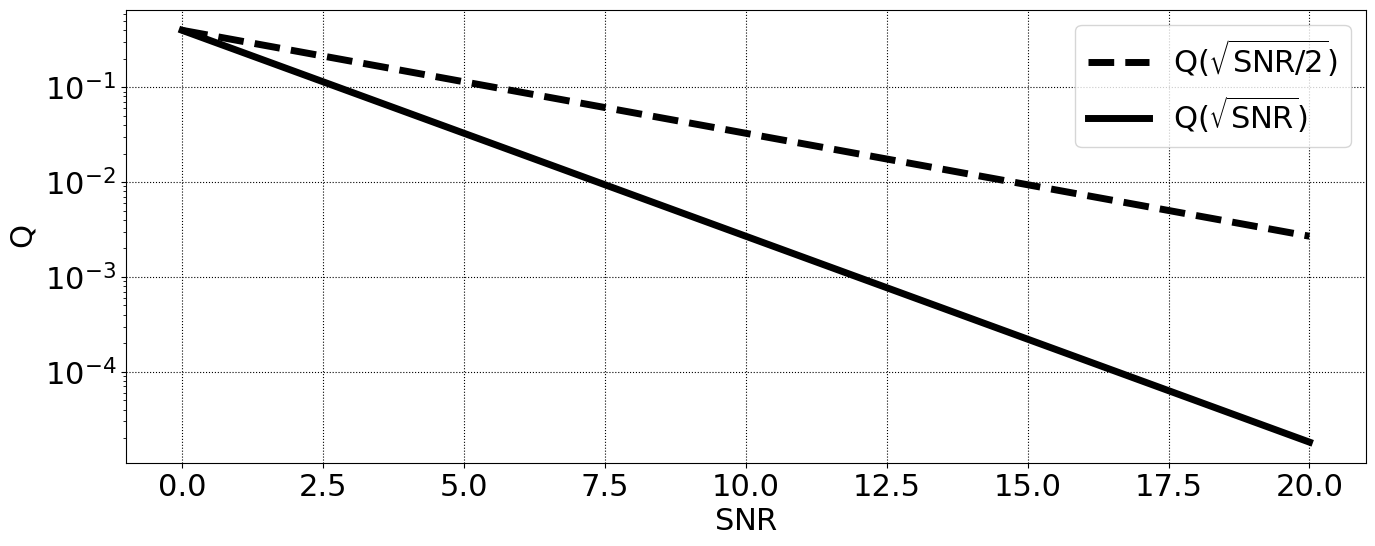

In [6]:
plot_BER(np.linspace(0,20,1000))